# Hyperparameters

Consider the Booth test function (below). This function varies differently in different directions, and these directions are somewhat skewed with respect to the inputs. Our agent will automatically fit the right hyperparameters to account for this.

Text(0, 0.5, 'x2')

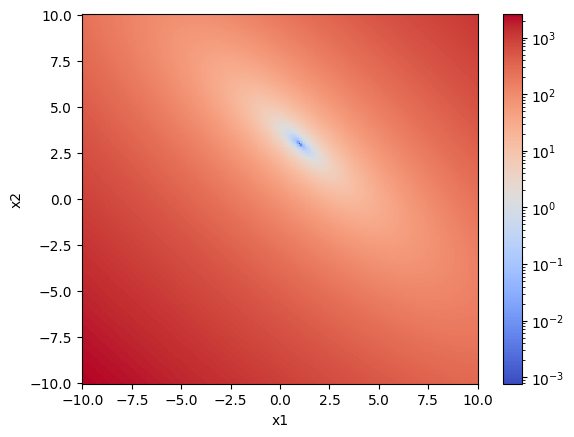

In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

from blop.utils import functions

x1 = x2 = np.linspace(-10, 10, 256)
X1, X2 = np.meshgrid(x1, x2)

F = functions.booth(X1, X2)

plt.pcolormesh(x1, x2, F, norm=mpl.colors.LogNorm(), shading="auto")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")

The optimization goes faster if our model understands how the function changes as we change the inputs in different ways. The way it picks up on this is by starting from a general model that could describe a lot of functions, and making it specific to this one by choosing the right hyperparameters. Our Bayesian agent is very good at this, and only needs a few samples to figure out what the function looks like:

In [2]:
def digestion(df):
    for index, entry in df.iterrows():
        df.loc[index, "booth"] = functions.booth(entry.x1, entry.x2)

    return df

2025-03-04 22:05:10.292 INFO: Executing plan <generator object Agent.learn at 0x7faea4acf990>


2025-03-04 22:05:10.295 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7faea4b8c7c0> from 'idle' -> 'running'




Transient Scan ID: 1     Time: 2025-03-04 22:05:10

Persistent Unique Scan ID: 'f6382fcc-8057-4b4e-b273-55e6e76edf9e'

New stream: 'primary'

+-----------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |

+-----------+------------+------------+------------+

|         1 | 22:05:10.3 |      0.621 |      0.532 |

|         2 | 22:05:10.3 |     -0.116 |      1.862 |

|         3 | 22:05:10.3 |     -2.788 |      3.095 |

|         4 | 22:05:10.3 |     -3.140 |      5.873 |

|         5 | 22:05:10.3 |     -5.812 |      1.171 |

|         6 | 22:05:10.3 |     -4.805 |     -1.605 |

|         7 | 22:05:10.3 |     -4.478 |     -3.354 |

|         8 | 22:05:10.3 |     -1.783 |     -5.661 |

|         9 | 22:05:10.3 |     -1.454 |     -1.381 |

|        10 | 22:05:10.3 |      0.762 |     -2.325 |

|        11 | 22:05:10.3 |      1.934 |     -3.945 |

|        12 | 22:05:10.4 |      3.786 |     -5.034 |

|        13 | 22:05:10.4 |      4.957 |     -0.695 |

|        14 | 22:05:10.4 |      5.473 |      2.441 |

|        15 | 22:05:10.4 |      3.644 |      3.827 |

|        16 | 22:05:10.4 |      2.449 |      5.199 |

+-----------+------------+------------+------------+

generator list_scan ['f6382fcc'] (scan num: 1)

2025-03-04 22:05:11.142 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7faea4b8c7c0> from 'running' -> 'idle'


2025-03-04 22:05:11.145 INFO: Cleaned up from plan <generator object Agent.learn at 0x7faea4acf990>


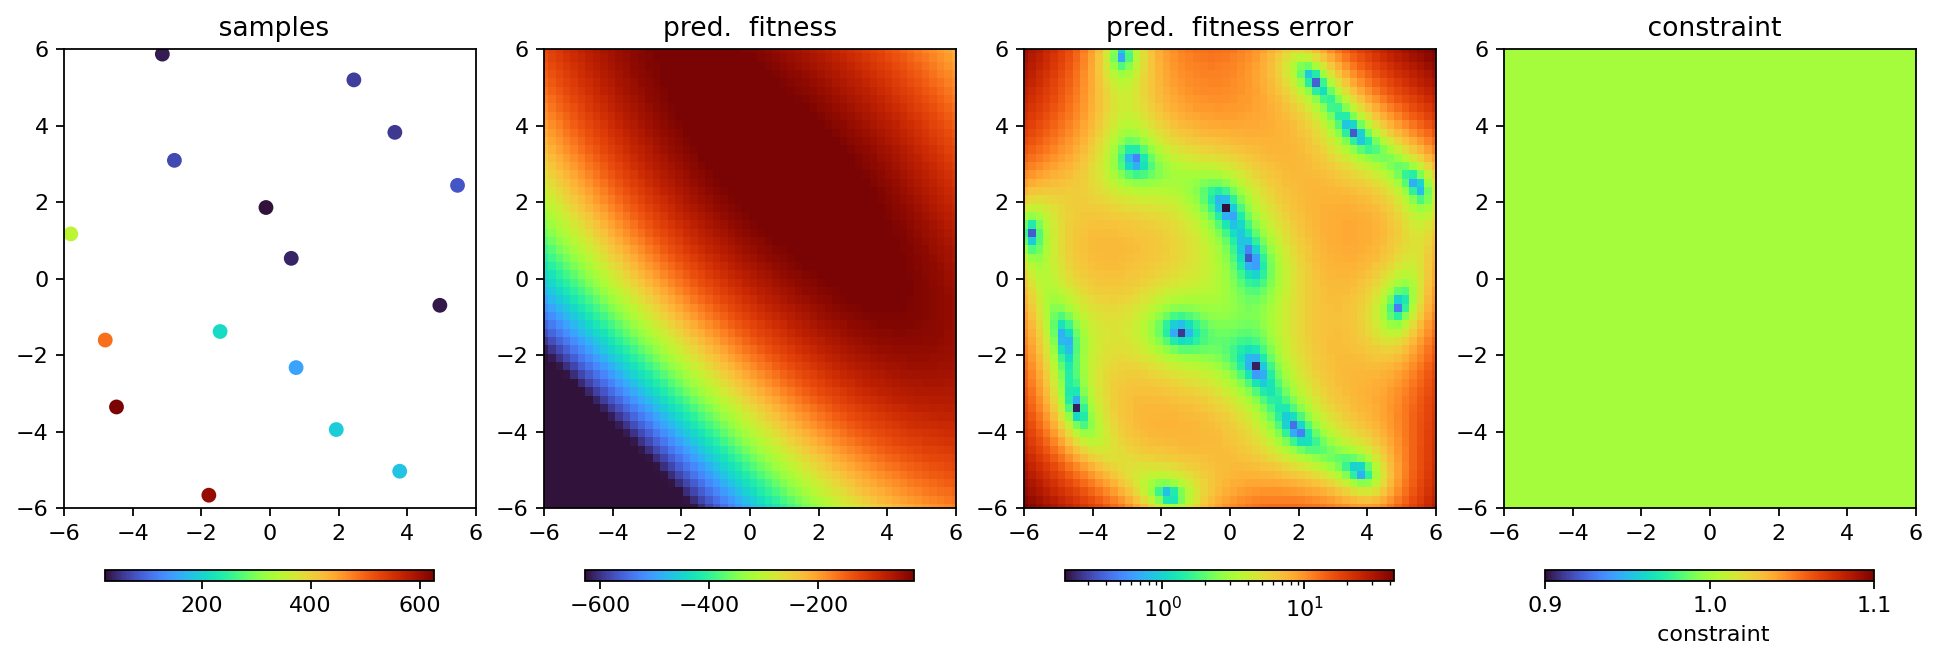

In [3]:
from blop.utils import prepare_re_env  # noqa

%run -i $prepare_re_env.__file__ --db-type=temp

from blop import DOF, Agent, Objective

dofs = [
    DOF(name="x1", search_domain=(-6, 6)),
    DOF(name="x2", search_domain=(-6, 6)),
]

objectives = [
    Objective(name="booth", target="min"),
]


agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=digestion,
    db=db,
)

RE(agent.learn(acqf="qr", n=16))

agent.plot_objectives()

In addition to modeling the fitness of the task, the agent models the probability that an input will be feasible:

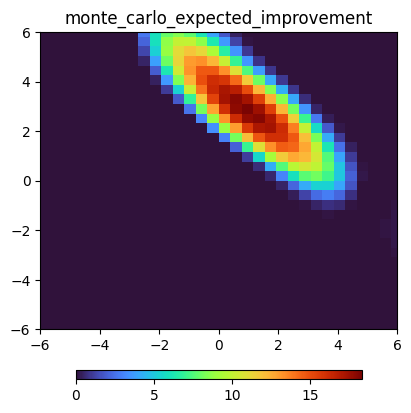

In [4]:
agent.plot_acquisition(acqf="qei")

2025-03-04 22:05:13.544 INFO: Executing plan <generator object Agent.learn at 0x7fae9c295540>


2025-03-04 22:05:13.549 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7faea4b8c7c0> from 'idle' -> 'running'




Transient Scan ID: 2     Time: 2025-03-04 22:05:19

Persistent Unique Scan ID: 'de5704ba-58a0-40bd-a9e5-c4f9e4b02689'

New stream: 'primary'

+-----------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |

+-----------+------------+------------+------------+

|         1 | 22:05:19.1 |      2.119 |      1.829 |

|         2 | 22:05:19.1 |      0.955 |      2.856 |

|         3 | 22:05:19.1 |     -0.526 |      4.456 |

|         4 | 22:05:19.1 |     -1.229 |      6.000 |

+-----------+------------+------------+------------+

generator list_scan ['de5704ba'] (scan num: 2)



Transient Scan ID: 3     Time: 2025-03-04 22:05:30

Persistent Unique Scan ID: '525c5805-ff26-44c9-946d-d6d0a45c1616'

New stream: 'primary'

+-----------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |

+-----------+------------+------------+------------+

|         1 | 22:05:30.4 |      0.721 |      3.273 |

|         2 | 22:05:30.4 |      0.761 |      3.114 |

|         3 | 22:05:30.4 |      1.092 |      2.987 |

|         4 | 22:05:30.4 |      1.304 |      2.699 |

+-----------+------------+------------+------------+

generator list_scan ['525c5805'] (scan num: 3)



Transient Scan ID: 4     Time: 2025-03-04 22:05:35

Persistent Unique Scan ID: '4d2c4932-c9b6-40ac-94f6-5877ffa34ab7'

New stream: 'primary'

+-----------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |

+-----------+------------+------------+------------+

|         1 | 22:05:35.9 |      1.094 |      2.840 |

|         2 | 22:05:35.9 |      1.146 |      2.944 |

|         3 | 22:05:35.9 |      1.009 |      2.994 |

|         4 | 22:05:35.9 |      0.910 |      3.143 |

+-----------+------------+------------+------------+

generator list_scan ['4d2c4932'] (scan num: 4)



Transient Scan ID: 5     Time: 2025-03-04 22:05:39

Persistent Unique Scan ID: '72a0bc9a-22a2-408a-bed0-2911c046647f'

New stream: 'primary'

+-----------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |

+-----------+------------+------------+------------+

|         1 | 22:05:39.6 |      0.890 |      3.145 |

|         2 | 22:05:39.6 |      0.994 |      2.999 |

|         3 | 22:05:39.6 |      1.099 |      2.986 |

|         4 | 22:05:39.6 |      1.133 |      2.845 |

+-----------+------------+------------+------------+

generator list_scan ['72a0bc9a'] (scan num: 5)

2025-03-04 22:05:40.171 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7faea4b8c7c0> from 'running' -> 'idle'


2025-03-04 22:05:40.175 INFO: Cleaned up from plan <generator object Agent.learn at 0x7fae9c295540>


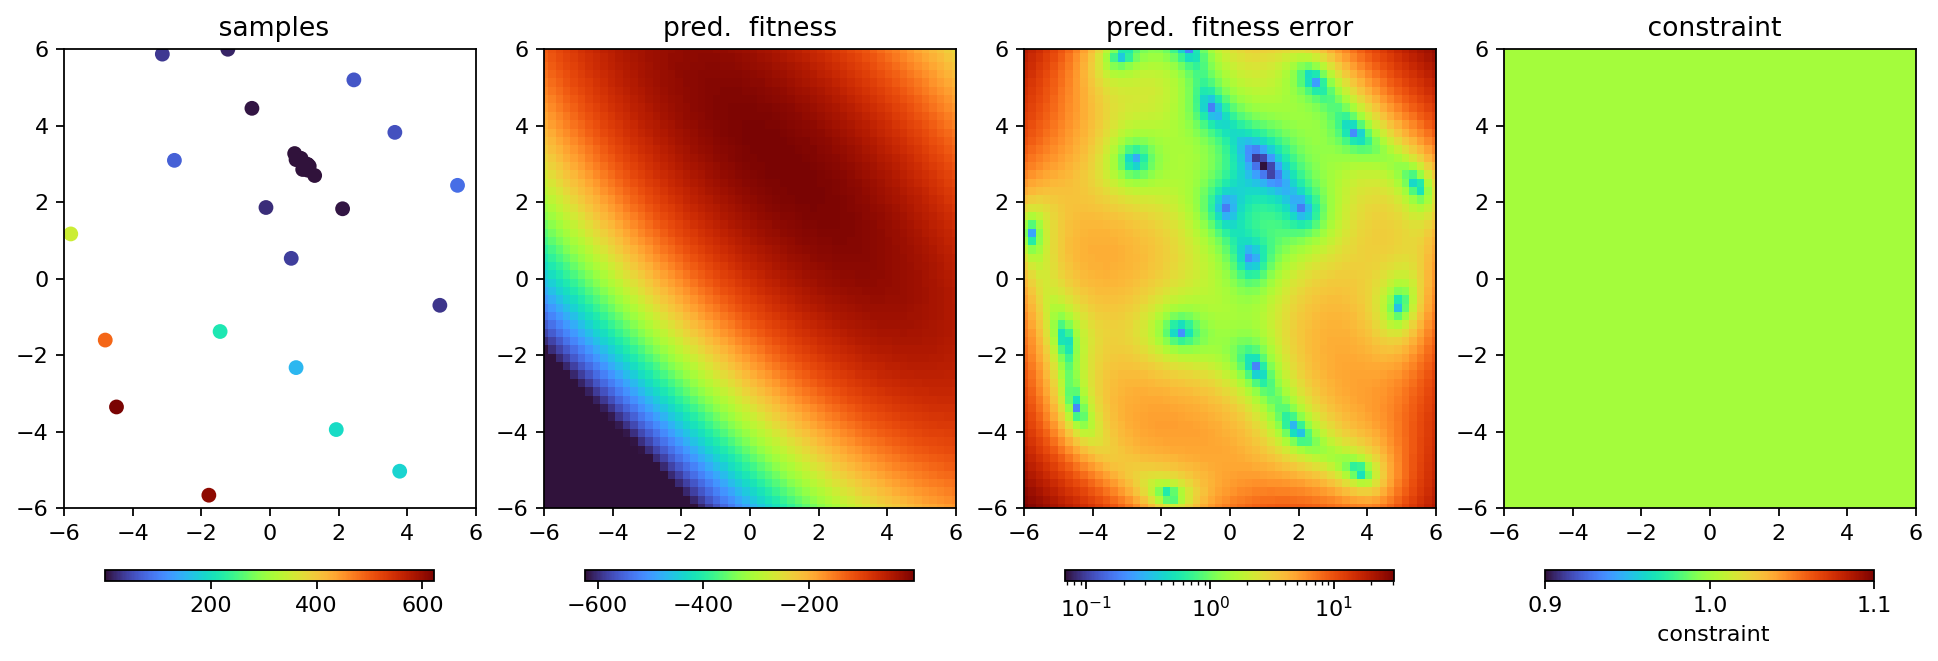

In [5]:
RE(agent.learn("qei", n=4, iterations=4))
agent.plot_objectives()

In [6]:
agent.best

x1                               1.008596
x2                               2.994011
booth                            0.000137
time        2025-03-04 22:05:35.931025982
acqf     monte_carlo_expected_improvement
Name: 26, dtype: object